In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [29]:
train_ds="/kaggle/input/tomato/train"
test_ds="/kaggle/input/tomato/valid"


In [30]:
os.listdir('/kaggle/input/tomato/train')

['Late_blight',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Septoria_leaf_spot',
 'Early_blight',
 'Spider_mites Two-spotted_spider_mite',
 'powdery_mildew',
 'healthy',
 'Bacterial_spot',
 'Target_Spot',
 'Tomato_mosaic_virus',
 'Leaf_Mold']

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
                                 
test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [32]:
train_generator = train_datagen.flow_from_directory(train_ds, target_size=(150,150),batch_size=32,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds, target_size=(150,150),batch_size=32,class_mode='categorical')

Found 25851 images belonging to 11 classes.
Found 6683 images belonging to 11 classes.


In [33]:
test_generator[0][0].shape

(32, 150, 150, 3)

In [34]:
train_generator[0][0].shape

(32, 150, 150, 3)

In [35]:
img= train_generator[0]
print(img)

(array([[[[0.53333336, 0.5254902 , 0.5803922 ],
         [0.5411765 , 0.53333336, 0.5882353 ],
         [0.5647059 , 0.5568628 , 0.6117647 ],
         ...,
         [0.5686275 , 0.54509807, 0.5921569 ],
         [0.49803925, 0.47450984, 0.52156866],
         [0.5647059 , 0.5411765 , 0.5882353 ]],

        [[0.5803922 , 0.57254905, 0.627451  ],
         [0.5647059 , 0.5568628 , 0.6117647 ],
         [0.627451  , 0.61960787, 0.6745098 ],
         ...,
         [0.5882353 , 0.5647059 , 0.6117647 ],
         [0.4666667 , 0.4431373 , 0.4901961 ],
         [0.46274513, 0.43921572, 0.48627454]],

        [[0.63529414, 0.627451  , 0.68235296],
         [0.53333336, 0.5254902 , 0.5803922 ],
         [0.54509807, 0.5372549 , 0.5921569 ],
         ...,
         [0.50980395, 0.48627454, 0.53333336],
         [0.4901961 , 0.4666667 , 0.5137255 ],
         [0.52156866, 0.49803925, 0.54509807]],

        ...,

        [[0.7294118 , 0.7058824 , 0.72156864],
         [0.7686275 , 0.74509805, 0.7607844 

In [36]:
print(len(train_generator))
print(len(test_ds))

808
26


In [37]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

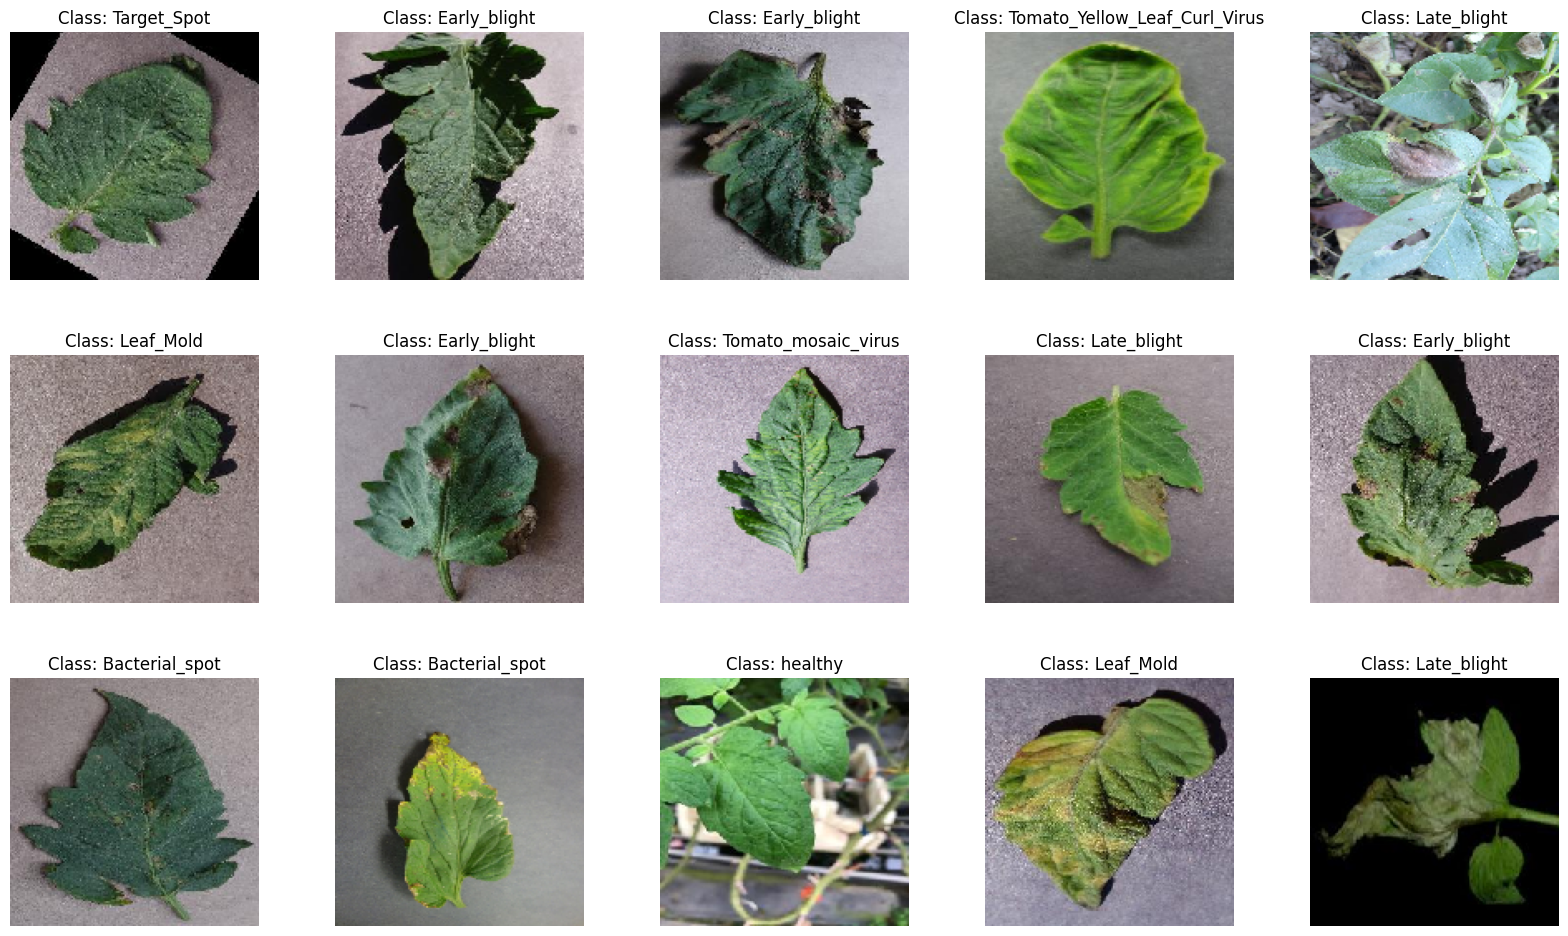

In [38]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

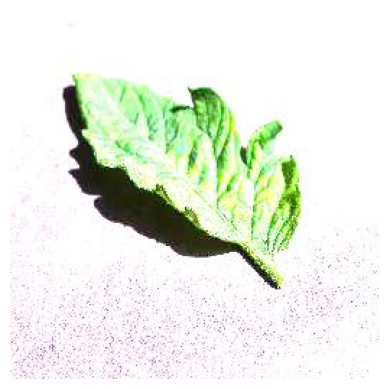

In [39]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/tomato/valid/Tomato_mosaic_virus/021accd9-bbb2-4777-8f94-93295e6de49e___PSU_CG 2075_newPixel25.JPG"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Build the Sequential feedforward neural network model

seq_model = Sequential([ 
    Flatten(input_shape=(150,150,3), name='input_layer'),
      Dense(128, activation='relu', name='layer1'),
    Dense(64, activation='relu', name='layer2'),
    # Dense(64, activation='relu', name='layer2'),
    Dense(32, activation='relu', name='layer3'),
    # Dense(32, activation='relu', name='layer4'),
    Dense(11, activation='softmax', name='output_layer')
])

In [42]:
# Print the model summary

seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 67500)             0         
                                                                 
 layer1 (Dense)              (None, 128)               8640128   
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 11)                363       
                                                                 
Total params: 8,650,827
Trainable params: 8,650,827
Non-trainable params: 0
_________________________________________________________________


In [48]:
from tensorflow.keras.optimizers import Adam

seq_model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [47]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels


(32, 150, 150, 3)
(32, 11)


In [49]:
history = seq_model.fit(train_generator,
                    epochs=25,
                    validation_data=test_generator,
                    
                   )

Epoch 1/25
808/808 [==============================] - 82s 100ms/step - loss: 1.2908 - accuracy: 0.5678 - val_loss: 1.3108 - val_accuracy: 0.5544
Epoch 2/25
808/808 [==============================] - 82s 102ms/step - loss: 1.2413 - accuracy: 0.5823 - val_loss: 1.2766 - val_accuracy: 0.5655
Epoch 3/25
808/808 [==============================] - 82s 101ms/step - loss: 1.1893 - accuracy: 0.5996 - val_loss: 1.2853 - val_accuracy: 0.5741
Epoch 4/25
808/808 [==============================] - 80s 99ms/step - loss: 1.1440 - accuracy: 0.6173 - val_loss: 1.2159 - val_accuracy: 0.5996
Epoch 5/25
808/808 [==============================] - 80s 99ms/step - loss: 1.1037 - accuracy: 0.6333 - val_loss: 1.2317 - val_accuracy: 0.5924
Epoch 6/25
808/808 [==============================] - 80s 99ms/step - loss: 1.0701 - accuracy: 0.6409 - val_loss: 1.1974 - val_accuracy: 0.6078
Epoch 7/25
808/808 [==============================] - 79s 98ms/step - loss: 1.0492 - accuracy: 0.6502 - val_loss: 1.2407 - val_accura

In [50]:
n_categories = len(os.listdir('/kaggle/input/tomato/valid'))# number of categories
print(n_categories)

11


In [51]:
results = pd.DataFrame(history.history)
results.tail()

,loss,accuracy,val_loss,val_accuracy
20,0.719924,0.763413,1.110592,0.650606
21,0.699324,0.770570,1.016174,0.674248
22,0.697242,0.769100,1.011469,0.673650
23,0.673941,0.778809,0.955185,0.692204
24,0.653005,0.785347,1.033602,0.674398


In [52]:
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,1.290796,0.567792,1.310846,0.554392
1,1.241266,0.582260,1.276579,0.565465
2,1.189283,0.599629,1.285286,0.574143
3,1.143983,0.617307,1.215882,0.599581
4,1.103656,0.633322,1.231729,0.592399


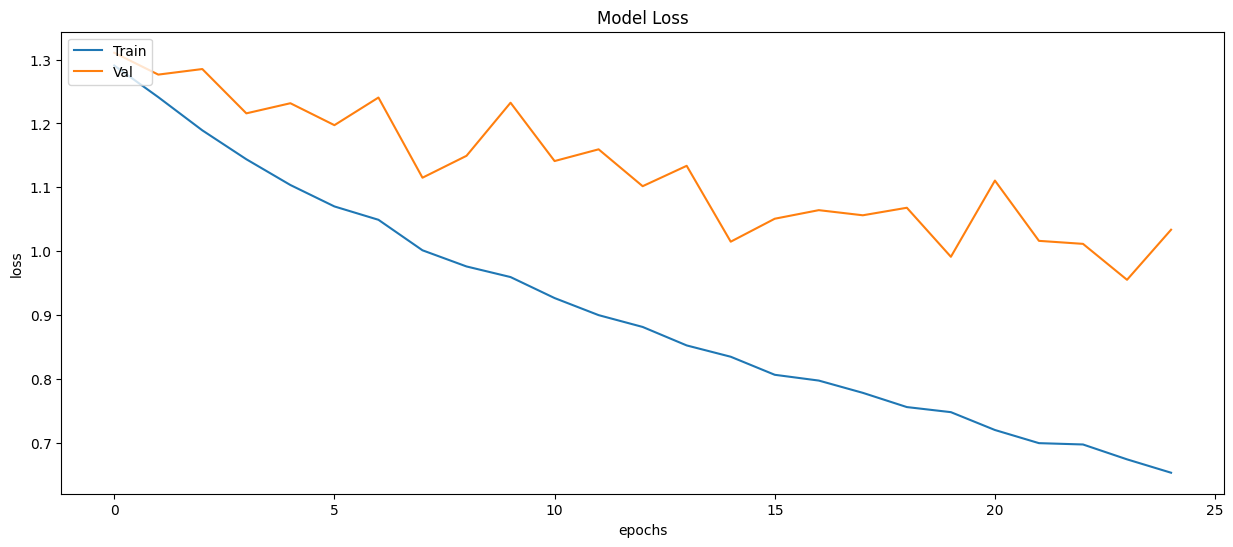

In [53]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

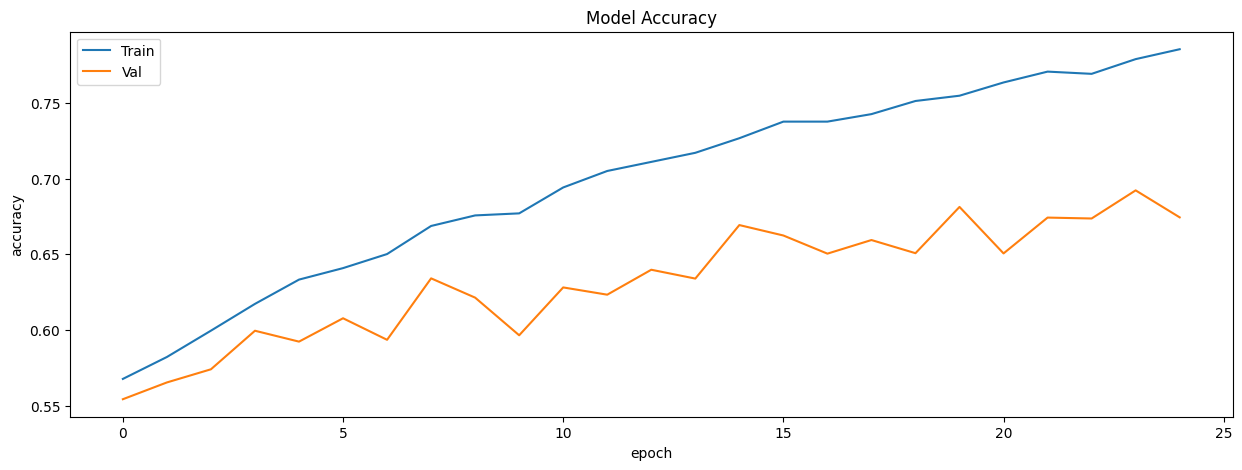

In [55]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [56]:
y_test_1 = test_generator.classes
y_pred_1 =seq_model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

209/209 [==============================] - 18s 85ms/step


In [57]:
results = seq_model.evaluate(test_generator)

209/209 [==============================] - 18s 85ms/step - loss: 1.0336 - accuracy: 0.6744


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1,y_pred_1,target_names = labels))

                                      precision    recall  f1-score   support

                      Bacterial_spot       0.10      0.11      0.10       732
                        Early_blight       0.10      0.10      0.10       643
                         Late_blight       0.10      0.11      0.11       792
                           Leaf_Mold       0.13      0.09      0.11       739
                  Septoria_leaf_spot       0.11      0.12      0.11       746
Spider_mites Two-spotted_spider_mite       0.08      0.06      0.06       435
                         Target_Spot       0.07      0.07      0.07       457
       Tomato_Yellow_Leaf_Curl_Virus       0.08      0.07      0.08       498
                 Tomato_mosaic_virus       0.09      0.08      0.08       584
                             healthy       0.13      0.14      0.13       805
                      powdery_mildew       0.03      0.04      0.03       252

                            accuracy                          

14/14 [==============================] - 0s 6ms/step


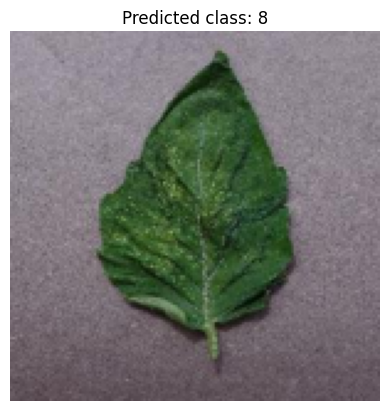

In [59]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/tomato/valid/Spider_mites Two-spotted_spider_mite'
img_size = 150

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions =seq_model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [60]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : Tomato_mosaic_virus
Class probability: 0.5303019
Predicted class for 2.jpg : Septoria_leaf_spot
Class probability: 0.42696518
Predicted class for 3.jpg : Spider_mites Two-spotted_spider_mite
Class probability: 0.8480639
Predicted class for 4.jpg : Tomato_mosaic_virus
Class probability: 0.5056948
Predicted class for 5.jpg : Early_blight
Class probability: 0.37702262
Predicted class for 6.jpg : Septoria_leaf_spot
Class probability: 0.3387952
Predicted class for 7.jpg : Septoria_leaf_spot
Class probability: 0.52756596
Predicted class for 8.jpg : Early_blight
Class probability: 0.5097751
Predicted class for 9.jpg : Target_Spot
Class probability: 0.8612534
Predicted class for 10.jpg : Spider_mites Two-spotted_spider_mite
Class probability: 0.36418802
Predicted class for 11.jpg : Spider_mites Two-spotted_spider_mite
Class probability: 0.5671473
Predicted class for 12.jpg : Septoria_leaf_spot
Class probability: 0.35608664
Predicted class for 13.jpg : Early_blight
C